## Machine Learning End to End Toy Project
This project is to know the overall flow of machine learning project.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./Data/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df = df.iloc[:, 1:]
df.shape

(100, 3)

In [7]:
import matplotlib.pyplot as plt

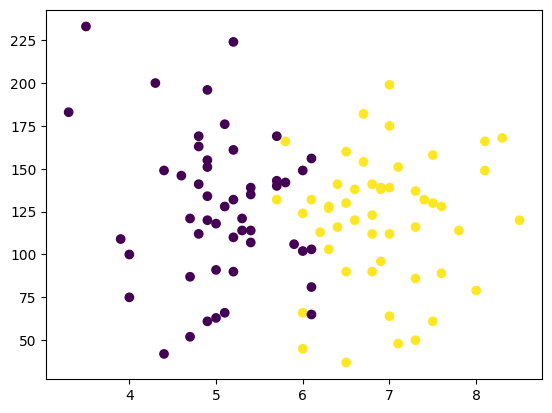

In [ ]:
plt.scatter(df["cgpa"], df["iq"], c=df["placement"])

In [14]:
X = df.iloc[:, [0, 1]]
X.shape

(100, 2)

In [15]:
y = df.iloc[:, -1]
y.shape

(100,)

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 2), (10, 2), (90,), (10,))

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [24]:
clf.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [27]:
y_pred, y_test

(array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64),
 78    0
 17    0
 53    1
 98    1
 47    0
 30    1
 86    0
 68    0
 41    0
 40    0
 Name: placement, dtype: int64)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, y_pred)

0.9

<Axes: >

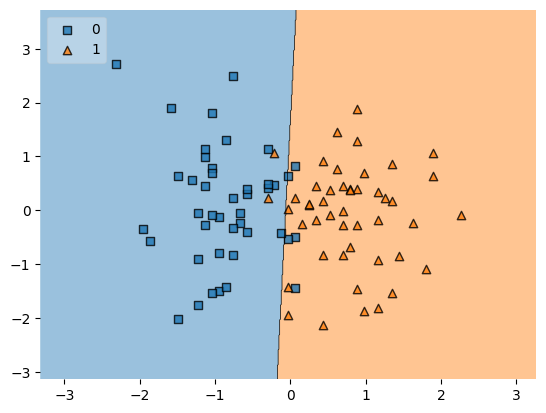

In [30]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf, legend=2)

In [31]:
import pickle

In [32]:
pickle.dump(clf, open("model.pkl", "wb"))